## Question 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('driverdata.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [6]:
# data preprocessing
df.drop(['id'],axis=1,inplace=True)
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [7]:
df.isnull().sum()

mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

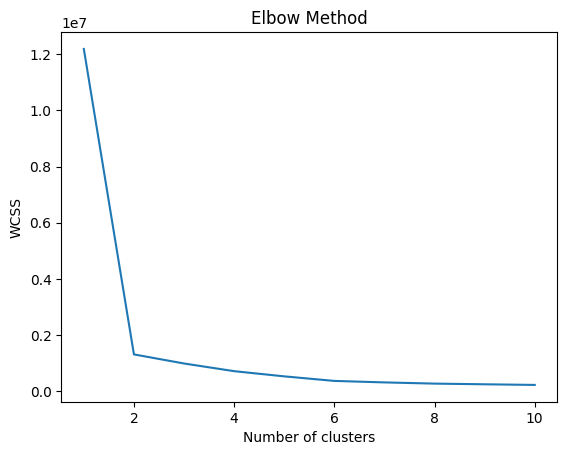

In [8]:
# Checking optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Accordig to this the optimal number of clusters is 2

### Implementing Traditional K-Means from Scratch

In [9]:
# Applying KMeans to the dataset

import numpy as np

def kmeans(df, k, max_iters=100):
    # Convert DataFrame to numpy array
    X = df.values
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [10]:
kmen, centroids = kmeans(df, 2)
print("Cluster labels:", kmen)
print("Centroids:", centroids)

Cluster labels: [1 1 1 ... 0 0 0]
Centroids: [[180.017075    18.29      ]
 [ 50.04763437   8.82875   ]]


### Implementing Traditional K-median from Scratch

In [11]:
import numpy as np

def kmedian(df, k, max_iters=100):
    # Convert DataFrame to numpy array
    X = df.values
    
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.abs(X[:, np.newaxis] - centroids)
        labels = np.argmin(np.sum(distances, axis=-1), axis=1)
        
        # Update centroids
        new_centroids = np.array([np.median(X[labels == i], axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [12]:
kmed, centroids = kmedian(df, 2)
print("Cluster labels:", kmed)
print("Centroids:", centroids)

Cluster labels: [1 1 1 ... 0 0 0]
Centroids: [[179.33  11.  ]
 [ 50.28   5.  ]]


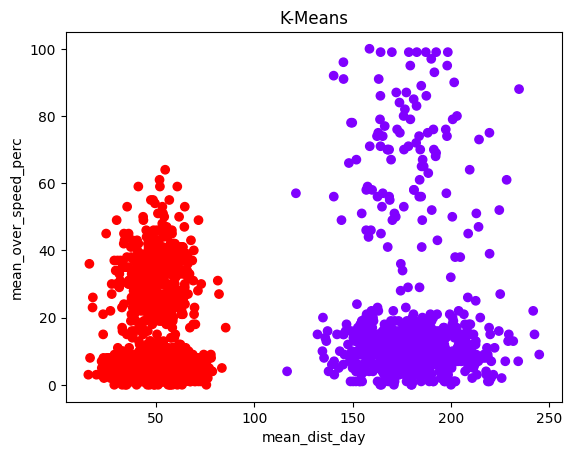

In [13]:
# visualizing the clusters
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'],c=kmen,cmap='rainbow')
plt.title('K-Means')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

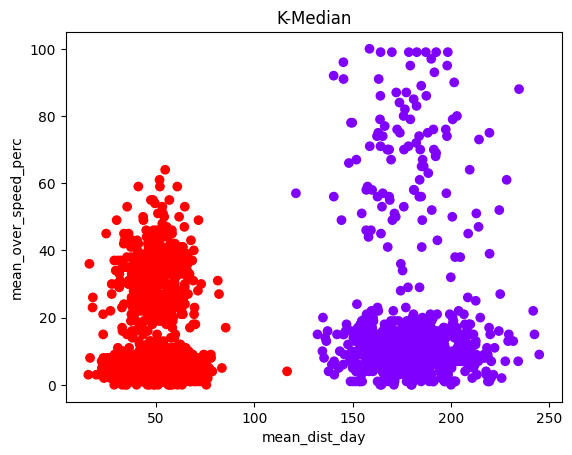

In [14]:
# visualizing the clusters
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'],c=kmed,cmap='rainbow')
plt.title('K-Median')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

## Question 2

In [15]:
# reading data
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [16]:
# dropping unnecessary columns
df.drop(['Formatted Date', 'Summary', 'Precip Type', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover','Pressure (millibars)', 'Daily Summary'], axis=1, inplace=True)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


### Statistical Analysis

In [17]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity
Temperature (C),1.000000,0.992629,-0.632255
Apparent Temperature (C),0.992629,1.000000,-0.602571
Humidity,-0.632255,-0.602571,1.000000


Judging by this, teh correlation between humidity and temperature is -0.6 which is moderate negative correlation. This means that as the temperature increases, the humidity decreases. Same can be said for correaltion between humidity and apparent temperature.

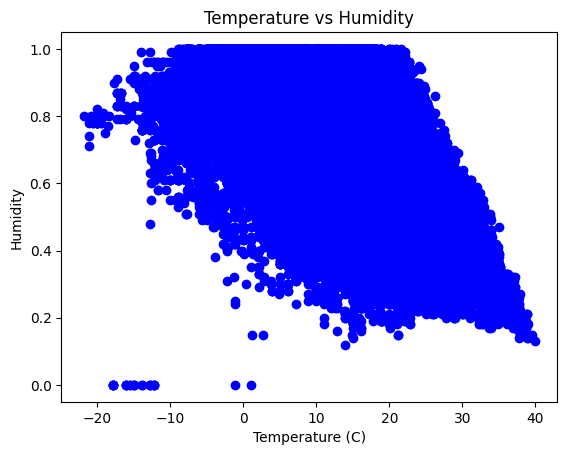

In [18]:
# correlation between humidity and temperature
plt.scatter(df['Temperature (C)'],df['Humidity'],c='blue')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.show()

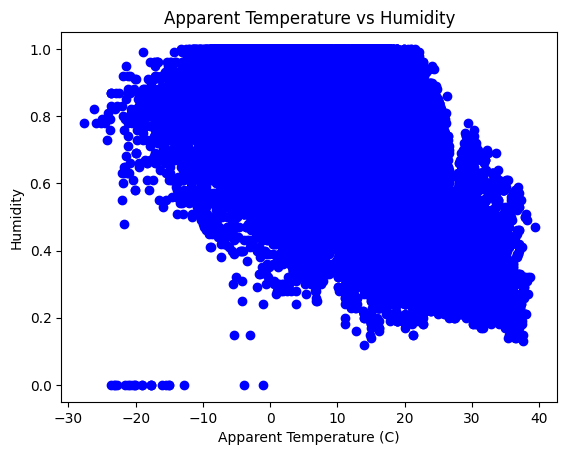

In [19]:
# correlation between humidity and  apparent temperature
plt.scatter(df['Apparent Temperature (C)'],df['Humidity'],c='blue')
plt.title('Apparent Temperature vs Humidity')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Humidity')
plt.show()

### Train Test Split

In [20]:
# train test split

split_index = int(0.8 * df.shape[0])
train = df[:split_index]
test = df[split_index:]

X_train = train[['Humidity']]
y_train = train[['Apparent Temperature (C)']]
X_test = test[['Humidity']]
y_test = test[['Apparent Temperature (C)']]

### Linear Regression

In [21]:
# applying linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
# mean squared error
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)
mean_squared_error(y_test,y_pred)

66.80220073048646

In [23]:
# predicting the values
y_pred = lr.predict(X_test)
y_pred

array([[ 4.07794176],
       [ 2.07364866],
       [ 1.73959981],
       ...,
       [16.4377492 ],
       [15.1015538 ],
       [14.76750495]])

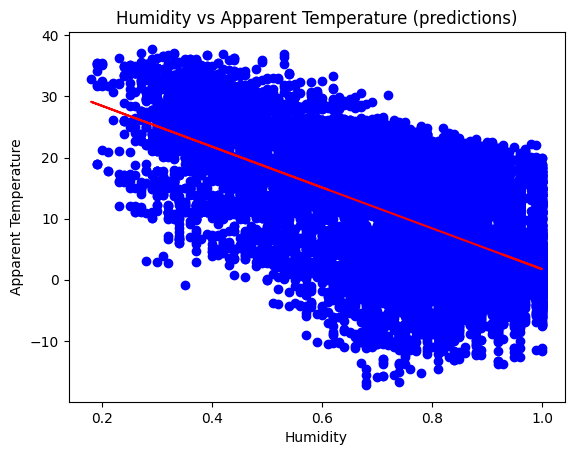

In [24]:
# visualizing the results
plt.scatter(X_test,y_test,c='blue')
plt.plot(X_test,y_pred,c='red')
plt.title('Humidity vs Apparent Temperature (predictions)')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature')
plt.show()

## Question 4

In [25]:
input_weights = [[0.1, 0.2, 0.3, 0.4], 
  [0.5, 0.6, 0.7, 0.8], 
  [0.9, 1.0, 1.1, 1.2]] 
hidden_weights = [[1.3, 1.4], 
    [1.5, 1.6], 
    [1.7, 1.8], 
    [1.9, 2.0]] 
output_weights = [[2.1, 2.2], 
    [2.3, 2.4], 
    [2.5, 2.6], 
    [2.7, 2.8]]

hidden_biases = [0.9, 1.0, 1.1, 1.2] 
output_biases = [1.3, 1.4]

In [26]:
# activation functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [27]:
inputs = [0.5,0.1,0.9]

### Forward Pass

In [34]:
hidden_layer_summation = np.dot(inputs, input_weights) + hidden_biases
print(f'Hidden layer summation: {hidden_layer_summation}')
hidden_layer_activation = sigmoid(hidden_layer_summation)
print(f'Hidden layer activation: {hidden_layer_activation}')

output_layer_summation = np.dot(hidden_layer_activation, hidden_weights) + output_biases
print(f'Output layer summation: {output_layer_summation}')
output_layer_activation = sigmoid(output_layer_summation)
print(f'Output layer activation: {output_layer_activation}')

Hidden layer summation: [1.81 2.06 2.31 2.56]
Hidden layer activation: [0.85936187 0.88695417 0.90970186 0.92824246]
Output layer summation: [7.05775552 7.51618155]
Output layer activation: [0.99914003 0.99945609]


In [32]:
def forwardpass(inputs, input_weights, hidden_biases, hidden_weights, output_biases):
    hidden_layer_summation = np.dot(inputs, input_weights) + hidden_biases
    hidden_layer_activation = sigmoid(hidden_layer_summation)
    output_layer_summation = np.dot(hidden_layer_activation, hidden_weights) + output_biases
    output_layer_activation = sigmoid(output_layer_summation)
    return output_layer_activation

In [33]:
print(forwardpass(inputs, input_weights, hidden_biases, hidden_weights, output_biases))

[0.99914003 0.99945609]


### Backward Pass

In [41]:
# backpropagation

def sigmoid_derivative(x):
    return x * (1 - x)

y_true = [2,2]

def backpropagation(inputs, input_weights, hidden_biases, hidden_weights, output_biases, y_true, learning_rate=0.01):
    hidden_layer_summation = np.dot(inputs, input_weights) + hidden_biases
    hidden_layer_activation = sigmoid(hidden_layer_summation)
    output_layer_summation = np.dot(hidden_layer_activation, hidden_weights) + output_biases
    output_layer_activation = sigmoid(output_layer_summation)
    
    error = y_true - output_layer_activation
    output_layer_gradient = sigmoid_derivative(output_layer_activation) * error
    hidden_layer_error = np.dot(output_layer_gradient, np.transpose(hidden_weights))
    hidden_layer_gradient = sigmoid_derivative(hidden_layer_activation) * hidden_layer_error
    
    hidden_weights += np.dot(np.transpose(hidden_layer_activation), output_layer_gradient) * learning_rate
    output_weights += np.dot(np.transpose(output_layer_activation), output_layer_gradient) * learning_rate
    
    hidden_biases += np.sum(hidden_layer_gradient, axis=0) * learning_rate
    output_biases += np.sum(output_layer_gradient, axis=0) * learning_rate
    
    return output_layer_activation

print(backpropagation(inputs, input_weights, hidden_biases, hidden_weights, output_biases, 0.04))

ValueError: shapes (4,) and (2,) not aligned: 4 (dim 0) != 2 (dim 0)

In [42]:
def main():
    print(forwardpass(inputs, input_weights, hidden_biases, hidden_weights, output_biases))
    print(backpropagation(inputs, input_weights, hidden_biases, hidden_weights, output_biases, 0.04))
    print(forwardpass(inputs, input_weights, hidden_biases, hidden_weights, output_biases))
    return

main()

[0.99914003 0.99945609]


ValueError: shapes (4,) and (2,) not aligned: 4 (dim 0) != 2 (dim 0)